# Data Argumentation
A common problem, is the amount of data available to enter the models, for models to present the expected results it is necessary for training to occur with a large amount of data (dataset), but in many cases the data needed to perform these tasks is not available.
This is where the **Data Augmentation** technique comes in that, as the name suggests, allows us to augment our dataset in two ways:




*   Introducing disturbances in the original data. For example: taking an original image centered, we replicate it off-center, reversing axes…
*   Using different distributions. Example: if we want to train a model to classify high-resolution images, we add low-resolution images, with noise… always maintaining the highest high-resolution ratio.



At first, neural networks are not intelligent. For example, a poorly trained neural network would think that these three tennis balls shown below are distinct and unique images.

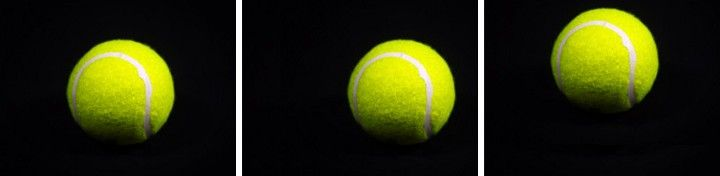



The same ball with some translations.



So if we work with images, it is only necessary to make some small alterations to our dataset and we can achieve our goal.
There are many ways to augment data with images, such as:


1.   Turn around (Flip)
2.   Rotation

1.   Scale
2.   Cutout

1.   Traslation
2.   Gaussian noise









The Keras library provides the ability to use data augmentation automatically when training a model.
This is accomplished by using the ImageDataGenerator class.
A variety of techniques are supported, as well as pixel scaling methods, such as:



*   The changes in the image (translations) through the arguments **width_shift_range** y **height_shift_range**.
*  Turning the image around using the arguments **horizontal_flip** y **vertical_flip**.
*   Image rotations through storyline **rotation_range**
*   Image brightness using the argument **brightness_range**.
*   Image zoom using the argument **zoom_range**.

Let's independently look at examples of images after they have been magnified. It is common to use a variety of augmentation techniques at the same time during training.


In [10]:
import matplotlib.pyplot as plt    #Library that allows graphing, very MATLAB style
import numpy as np                  #Library that allows working with arrangement  
from numpy import expand_dims       #Expand the array shape 
from keras.preprocessing.image import load_img    #From the Keras library for data augmentation, we load the image in the python image library (PIL) format
from keras.preprocessing.image import img_to_array #will take a picture (PIL) and convert it to a matrix. If part of a PNG image, the values within the image will be between 0 and 255.
from keras.preprocessing.image import ImageDataGenerator #will take a picture (PIL) and convert it to a matrix. If part of a PNG image, the values within the image will be between 0 and 255.
from PIL import Image #libreria de imagenes de python
from urllib.request import urlopen #Permite leer una direccion electronica

First we upload an image from the internet

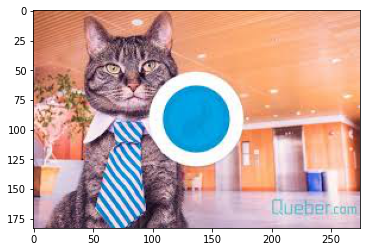

In [12]:
url = ' data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxMSEhUSExMWFRUVFxgYFxUXFxcVGBUXFRcXFxUVFxgYHSggGBolHRUVITEhJSktLi4uFx8zODMtNygtLisBCgoKDg0OGhAQGy8mICY1LS0wLTAtLS0tLSstLS0tLS0tLS0tLS0tLSsrLS0tLS0tLS0tLS0tLS0tLS0tLS0tLf/AABEIALcBEwMBIgACEQEDEQH/xAAbAAABBQEBAAAAAAAAAAAAAAAFAAIDBAYBB//EAEIQAAECBAMFBQYEBAQGAwAAAAECEQADBCESMUEFBiJRYRMycYGRQqGxwdHwFCNS4QdicvEVJDOSFlOCstLic6LC/8QAGgEAAgMBAQAAAAAAAAAAAAAAAgMBBAUABv/EADMRAAIBAgUCAwYGAgMAAAAAAAABAgMRBBIhMUFRYSJxgQUTFDJS8CNCobHB4WLRgpGi/9oADAMBAAIRAxEAPwBSz+m3PDc+azEkrpc64bnzUbQxSefobDyQPnEqTp7j8kJ+cYx6Imkjlnrh4leajYQ9h59ONXmo2ENAOR9D/wCCfnEgToz9D/4p+ccTYakXtn/vV6mwhk2oCSyi55d9Q9bJi1g0Pp/6p+cUainKpjBxwjkGvyGWcHTjdgydkTU6kTLpVf8ASq6vLQROqWxYi/XiPoLCAW2KVUgpWkkHoLHIHKC2w9qCci12zRmPEAQ2pSy6gQqX0LaUv18b+4WES9mdfTP/AOqbROhINsjyzHkE/OO9m1m+non6wqwdxqJXT1/8UxIUae7/ANUwT2VWplggp1zAD+DcvOObTq0rZgzZnU9LfWCcI5b316Cs8s9sunUFTFBIJJYDN7D0F4BHaypqilHCnRrP1LRDvTtFyJCCzkYj8GbPLLwiTd6iKgSzB7O/EOfj9IdSo+HMyJVNbBTZc5RdKjlcHIkdWuT9YvpH3l+8NmUmBaVaKT79fgIe5+/2ivUjaQ2Luhe73fvCYfdv3joT9/f1hAff39YSwzoHl99bw8Dn9+t/dCH3p8Iel/u0CcLD9n9/pHfH79fpDky+f38IcGH3/aOIGN09b/H6Q/ATn9+v0hwmNkPX9oWI828LR2hGouxbP3/v9ITDU/fn9I5hEdxDQQSaI1O+A9fp+0cUTqfS336R1z92jloLMRYbh+/to639vtoc3SHpQYYiGMwk6/L6fCG9hE2FsoRHNX35QeUG5EJQH230jrgZe77EIsOsc7TkPnEXOsJzy+/SFHcK+R90KJuRYw4S33hf/wDRieWlunu9w4jDAPsW/f3xYkp5ffp8zCiwSS06ft7hc+cSgNb3C3uT8zClyz95fIfGJ+yt9/sPjHWOuNlJ0H35D5mJaWnBmE64Dy+USS0j7/f6R2ZMZSdLm/Jg/wAuUNp6NMXJ3GbVo0zpbMGAFzkD9k6RgpFSqRPdwz3yb3aX/e0epzCkSlOAQRcFiDzsTlGL3j2IgoxlTAqexGQuWfJgDZmjSaTWpRu0y6jeKQEFS1BIBYvk9vLXWJJe8VOoWnIZgWKgA3Ni0efr2XcYlOASAC4dnLEZElvKxyaGU1D2om+ykqxoBdIcIW1uWEl+eICzwn4aL5J+IkuDdzt66YAnGVBLOUJUpNyAA7M94oK30krSezd3AGIankP2jLL2OvCU42cgJUATxAkywABbEQrI5sPBU8krIxy04syQwxAlgSAf1Mw/m5RPw1NEfEzLcuYJkxSnNyA5vzsHt1MekbCpXkoUxKiLk3J8W84yWwpspLy5qWCjdX6SVJGHFqRce+NfQzEIlqUg4k58Fm8g5119TDbpEXuy3tJYOEcvln8RFUCK0+djnIVphUQnpYOed4s4jGZWd5Nl+CsrDgj7MODD7+/jDAIcIrsNDwrkI7iPhDQIcBAsmwm5w4GOYY60CyTrx0QgIe0QQNCYfh6wmHOOhQGXT3ZfGGRS5BbYgkcocEQ3tDHXPOCTRDuShPOOgCIxD0vyh0WLaJGiIywTyibDESgIOQKEJKR1hzgRGXhYesRe2x1uo9/toUR4PGFE5iMqMYmUH+v38ouS0RAGf62i1JUnU+kLsW2PBb7+f7xIm8NUgK1iSWkiIBZNLlwyqZKQpnwHE3QOFN1YmJgqB+3ajBJUwdShhSH1IP8AeHQ3SQqT0I5W3AhBmA4rHCSQEsbhKhk5v46Rnq7axnFRWzDCQnyBALswYDK2Vy0UaKjUiWQVjCA5PieZSQxAsDoRzizIqpS5aUoxzl4kpQiUxuQopdSlEJsFHPQ6CL9rFCTb1BW1F/kqmthJIHw4ybsqxBPW/U1V0qZSaUqSSopmlQAJOKalLi3IgC2T8nhYZfZmRUSJ0lCjiEzB2iEl8L4k5H5ZwX23RKQoLJxSlIZBS7McJCnyyFvGD0ewBk6OYpPZq/RPkhX9KWdz1xJ1AfFe9rs9BG0exZWFaXGG2Y58gRkL2HWLMmlShCu7dupBcMSDq6gXBEE5tIqUacS5RmVUxBIKlEIlSyeMrUA5HEzC556xzsjlqZyel1Ed5IUpIdwTkCosGbqbZW52JFRMRwFZZ020thJJIPeI+cTUuy6lalk1AeXOMpQTLAQVCYhJACgCQcYAOrcjEtbsqbJWtRMuZgspMvECUi+R9qwOF9NIjR6Ep8lrdPaQmTpyFB8ISEM4ZIKnCQRcOfePPVdlyLj3+kedpqECbLmyw9wpJBvhNlS1B2eyhpG/p14khQyIBHnFHFQtK5doTuiUJi1TUK1hwzDUlohSTrf75xJ4HyMVFlvqOblbQauVhJHLlCCYYomFCnuMQ9xHQuIo6IBkkmMxx45HcUQSOAh7RGDHQYlAseI6BHADDkpMMQLJEvDwISUDnEiAOUWYoS2SJSGyiNQ6ROFw5E0Jd04jo+kNsnyJu1wU1IJjiQ1vfEs5Tl2A8IghTsmNV2h7jpChekcibnWPOq+Y8+Zn3j4cs4nlzwlsSgHsH58oqMoqxgcKyVMbHNg0XkUowgKLgZuxdxqYmT1GxlpoTTqwIAKyQMnYlvFshE8urBKUpmM4xWu6R1ygdPkpUhK0YiCO8xUcI1PQxTolYVomeyrC5cB1lwx5C2UALnVadjY9qCL+60Z3eaqIUiWk3NzmLA3cjTKC1PPJKgUsxtd3HNtIye+rqmS0BRQpTAKDWBJfM9BDcPrNHVvkuiLZ6hUTezAxS5b4sVwqcQCCp+Eiw8MfSDVDtXsgpKpWApWlThLKQtP8qrTEsSGCnIUQMo5u5sYUqVoWMYmP3h3gkPpfz6RJVISVfkibMUHDrWMEsHTEq6iQVXZ7+EaNkygwzSz5UxRnJRMmEIYoQpBSlL4yMMxaSh7OSgEgAXaMrQb0iahVKtiRNVMdPdCF4j2QyLhRDMMh0gh+DKEklQxqdgAbu4Z3OK5sQR5Rk9q7vzJCEqRfHMDlNwHIwp66+sDGCjc41VZLSJSvaDDI3u7tpr7ukAdmb2qVtGUcXZ4JSZBfillCbqUQ4LFgQMxfwgydnTOxaYbMW4kMl/acEaPGc2TsNYT2q+EIWezmPyzGuIEvlyiIO902MqQcbNI2Ndtl1vL71mUEKS5GqUqchTOHuQDkDlRo5TvhmdrjJxqSoKGFj3mOJyo9OTc20QROdJwpaxWFOCC4sXyd9X0s0PkLmzqiXTU8rGoKOKaQU4QDxYiOEgHXWwg1FJWQq/JmNpz0yJ02X3UrugsDdVynxcPbUx6jupseeqnlugot7XD5sbxo9hbpSJBExQE2d/zFB8L3ZAPdHv6xoDAVIKaswI4hwfhM/L3dPtLHkH+cSK2ByX6p/eDMyalN1KA8SB8YZLq5arJWk+CgfhC/hoW2IeMqX+b9jPVGxpqcmWOQLH0MDVyyCxBSeRjcxBVUiJgZQfrqPA6QmeEi/lH08dJfMjEKSY6lMENqbOVJv3kHXl0MUkNGdOm4uzNOFRTjmQgiO4RCVHHhbDWo8RIDEIhwiYshoeYSTDCY6kwV9QbFpBiQRAlUPC4fGQposJVCVEKFw4qhmfQXl1EuIsUOXEV4VKQyKJccchoTCiMzJsjzjaUlaAo4uIqDSk5BIUGHvLmHT9lrWBxYUllKRiJLsygk8m5wX2rsmavGuSg41AIxOEhOd/J9ILbE2alICZhSVhI41kHMkKOGzsw9YtQpylrsKm4xbQHlbImTpXZIXgAABxO6ktrqHiKu2XKlplhIsl8drJwkk8RsA4NuQjQbfoJqFibKClgJ7NODhGFTd4E6EZwAqk1CT2KsKSt8KSRxhLFTjzIfrETWRWt6gTSks9/QJ09fSzClAJlgBWJbK4cDMMiOIObcoye+SZaxLVLmgpWFBwS8skugqTmDcjpeLdKGTMSUntsSgoAkF7nJ2YDWKUpP4grQmUUlIB434gA1wLhxducFRqWnqgcs5R0d+wLlVNSVBE6aEJZseGygHbEU+l9HjTbOoZAbs54WcwUpL9WJIxZZB7MIpUU1AGCZd2IBDAD+kX6OVDM2MEZFPgOOSShRzzZQOTtox152i83YSkX9qSxhOJSgFAsVzUSbqdJdLdp7TP4AdS26slBlkKElQNzhxLAxC4Kld7I5QKlrM0AJUlEw+yWKX1KBn555jnBeRSz0y8ImlIa6nKyAEtwhRb1f3RFrk7aAur2BJFWiWnAmlUFLVIZuJJS6EoZsCjc+KrXsd2/ISuVgCVYbABIl5OAzLLNkbxTpdgSCAqdjmzCHM1SziT/SzYDc5RFWUKxKITUEpt3wFYcnIe5uNSY5QQTle12AZVObhUs4yrgxSMK8SipkhaFhL8QGuZJzj07djYaKSSEAcZutTu6tbnT++sY7+HuxAahc5XF2NkqZIBmLdyANUj/v1j0lUSirWlrYrV9dLkIMyYoJSnM/AAanpHnG3N+J00lMl5SOYbtFeJ9ny9Yo737dNVOISfykEhA0OhWep06ecBkiNzB4GMUpVFd/seR9oe1Jyk4UnZdeX/RyapSziUSo81EqPqYb2cSQlGNPKjEztsJ7K3kqacjDMKk/oWSpJ6B7p8o9H3b3ll1aWHBMA4pZPvSfaEeSC8Op565S0zJasKklweR+YilicFCqrrR/e5pYP2nUoytJ3j0/0e5zZYUCFBwbERkK+iVKmYQ5Buk8x9RB/d/aoqpCZosTZSf0qGY+9CI7tyRilEiykcQ8B3h6fCPL4qhdNPdHt8HiLNOL0ZmZktSbkERGVDwhs2aTmSYhKox576G7HuWEm98ukXarsQngKieuUCgqHibHQej0InG7TuPJhJVEZVEeOIaCLyTEiVCKiVRIFQN2jnEtpmQ/tIpBUSBcGpsW4FkknKIpgUnMEeIIjqKkoOJJYxBVVpUXUSYmclbuDGMr9iXHCioJ4hQvMxmRBOZUiThZKGWcK20mrYpJOibZtqIFbZqpxJTNlIMmWoKmLTdgBjDA3IsAWv0iTaRnJQeBSzOABCCkhCsTBJfQg3P8sDFVEyYEJTNC5qVfmMAzBV13sRwjSNOdRvQo5UtQuV0yJKlBJShPLGCVHiYZPnkIpVWyZa1InpKwpP6iSQGLDiuLkW6QdR3WUQs5uw0gPtPawfChOMgspvZJDseraQUttQ4RUnZ7GcrJapU9OFKnWFEzCysSmdi2WRizR0JM3t0HEoBONKSxWAHfkD0gPVUNaHmkYTjK8Lg4QRhJc91wYtbM2pNQCxCrEFSSLEMATYjLFl0iq1rcibu7WYa2tu2mb+ZI/LmFlEKDJ5kkaK90Y6sTWU5JXLWoP/UOrEeekeqbvUpEgLWGVN4yL2B7ov0v4kwTTTg5iNanrBORTlPXQ8MG8E17yV4nIcA8IuwfnnprBRG9cxAPaJmpGEte38oAjebTlU3aqwy0tJZU1YTjCDmEhIu+ZLZZwN2xKk1MhU1KStCMykEHhY3SbjnlleHKk2rpAuvFOzfcx9RvoAAE41HyF3+FzA+fvH2rAhTOPaJsrvA87+sFBuxKXKM9KFFCXdTdxrnElPEOfheDm6O5lNNBWJ2LDYhKAkEODmpL5tbTziXSkk20cq0XazWuptv4dI/yKF4cJmKWsjP2ike5ItFvfStMqjmkWUoBA/6yEk+QJPlBLZtOJcpKE5JDBy+R5xnf4lA/hB/8iX9FftEYeKlVin1M/GzcaM5LezPMZYh8cl5R2PUo8G9zsNmG0NK4aTHNkqI5Jyh5ENSmHxyIe5r/AOGFaRMmydFJxjoUkJPqFD/bHoxS8eV/w6H+cDf8tb+Fvm0eqx572hFKs7dj2PsiTlhlfhs86qeFSk/pJHoSPlEKpg5wR2hIBXNZJKjMUQpzYOXDfOK6NmKPsn0jzUqMm9D2UK0cquQS6tSQUgsDmIhM4wTRshf6fhE42VMw4XGHNn/aCjh58oGVemtgJ2pMTUkpUxQSnM87fGC6NicyPfFiXsdI9r3QawkuUA8VC2jAxQQWOlvSLHZcIOJyT3WLjq8GEbNQNfgIf+HkpzI81RPwdtwXi1xcBCUqJUyTBcz6cZqR6gxw7Upx7Q8hHfDU1vJE/EVHtFgmrQQkGBM6ojVzq6TNQUhTHIPw+jx57vRjkF808/rC6uHT1g7odRrvaasw3K2wpICQoMOg+kKPOTt5UKA91V6sPPS6HqGytpm1glK0utLlRBIyHjm8WKLZ8mUrFLDiYmynKnA8coEVCChQUM0WLapDOPEM8Ed36a0tRWVAhRBUW4i5NshYvFu0lOzQhqOVSRf7IS0KAyLsPEaecUasploCTZmcvc27pI0vEu0atKVKSnEVZOch4A/GBNUoqZLtcP4coiclshtKjJxudqiAlWJJU4wIQHdjYOeRtc5NEO6eykLnTEEEALdISojCUNiGeXjm8EJYwgDkGGlhaLG5slEtM+qmLSkLmLAKiAwScJJfK6R6dYVQjmkLru1PMaxQjG7/AG+suhSJSTiqJjMlLEy0m2NQPuGt9AYBb6fxSCHk0IC1mxnqHCnngSe8ept0VGU2Vu7MnLNTPJUta3US7lwCSTzZxyy5Rq7bmVGLZqNhbelyRJnS5naJViTUgPicl0rUFXd+0uc2MX1p/AzxPQcdHPZwLhL3DDpduYcZwJ3epZUmfME60mckS1AkMlTuDbJiCHGVj1glIrk0a1UsxaKimW/dIWpAJu6UvhPMeYvaNGjNTjt5rqu3dGXjIyjVvfun9L7/AOMuR06SaCcKiSe0pJzOElwH0HvZ8w4MMQn8LWyZtKt6eelSlIFwyWCktp3rcmI0h1NtCXTEyAtFXSrd0oIWuW+bpGWniQ4Y2jI7d2bjqiiTMK5CU45eFRP+ozpUxzBSB6PBVZ2g2/LzXfo0RhabdVK2i4+l826xZ71QTgpDguDcHob/ADijvZQGfSzUDvYcSeqkEKA82bzjF/w22quQRTTiOzWWlHJlEYijqCSb8z1t6WYzVLLJSXBdr0sycJcng0sx2ZlGk343fNPNM1A/KmF7ews5pPIHMekZsF49PRqxqQUong8RQlRqOEuCOHYdYdghwENsJcjscUYWUT7OoJlRMTKlhyfRI1UrkBESkoq7JhBzkkjXfwwoDimzyLMJaerkKX8ERv1rCQScgHPgIq7I2cmnlIlIySM9VHMqPUmKe9FVgkqSM1Bj0T7R+XnHlsXXzylU+9D3fs/CunThS5582BP+IU5iWb9RFdW8p0ljzP7QFkT0kgAKvrgWBlzIaHmXGBLFV1u7eh6uGEocK/qFF7wzdEpHrGa29vbWSlBloALtwAmxbnBfBFxO7EuolJWpIKsRz5PDsJVqVJtNicVTpU4JpWMGnebaE0kImrNwOFCQ2IsnSzm0UanbNW7Lnzn5YyMiRp1Bj0ybuWgA4WS7OEhna4eANZuYS7HXwi+0Uoyi9jm76VmmlrUpRKiq5UVEsW1MEkSLxboNndlSSkHNKlD1JMWpEi0ZVeH4rNOjWtTQLmU2Riemp8QJAcAs+j8ov1EuwiWRJSA6UgPn1gIU1dpkyrvKV5uz3kqDXB+UYPeSnnyJSVqU6FqICSXsNRyyj0+SOBY6R55vnVY5QlqSOBTpUMwC7p9Ysxywa8hUJSmmu558qZLJcphQ1aA8KLeZFbKew1iuNX9R+MFd3r8IIwJSmxF3UCVeDfOBKKZSnJIBcu+h1glR0q0ScMop7WaAbnJItbrYxaqR5sVlPw5UzNdo6yXJvzOlhDlz+JPiPjBOt3bnlWMJSCq6hisFakWyOcU17v1GIHCLN7QjKdOpfY3oYmhb5kWVznjK43BBNjMWTdmdSr9bDLONSrZ84ez7xGalyJiRgX+WvESlClJ4nUq9jcG1s7wzDU5qXiT+7lbFVKbhaLT+0Vtm7vIUpQZw9ixOIkvcDTP9840FO6AEF2TY2sz94kWu1/DXMV0rSjCjs7hi7FuYB+V4s1NLMmqlolLDKUELDhkYiHKSz4mez6nKL7MohrKPFMp5ayUCpJUZtjhHCUBBvhUT7TlsSb5xNsfZyKedN2bPSDJm3lqULkqyLnUt/uT1ixs+m7QT9nTmxyyVSVnQ526XCm5KPKHUso11OZSzhrKYlsVioAsxPoCdCAdY14QUI5Xty/PVSX7M8/UrzqSzpa8LrbSUH+6KWzdlSZSl7Oq5aMKi8qbhDjFkQSLObjkXBiuNiqppi5Si4ZJJS180IZObMA/LwvBqnWnaEo01RwVUp8KiGKmzceXEOjjpn6ldQJxTOOFaQhOJRJtLe7A8XeTfI2heKvkd9Hpdde68xuBd6kd2rPK+i5jLuuCSrUgO9yCwI7yeVnspyWPQmPRdzdv/AIqUyw01DBQLOoEcMxhk+o0Lx56mSwcIK1KCXUEkBWVyrQNhy5+gyprzKmAy5i0TgxdIU4vYEANhdgxsYzVqbFSN0e5T5CVpKVpCkqDEEOCOREYLbu4CgSumUCP+WssR/SrXz9YJbrb5ickIqQJU24fJCm1zOA6sT5xrkqBAILg5EXBh1KvUou8WZmJwdOurVF68nilTsmplllyZg64SR/uDiIZdHOVZMqYfBCj8BHuUKLy9qTt8plP2FTvpN/8AR5Vsrcipml5g7FPNV1eSR82j0PYmxJVKjDLFz3lm6lHqfllBKK1TWpRZ3P6Rn58oqV8VUraPboaGFwFGhrFXfVklTUJlpKlFgPth1jCV1eueqcVZYLJ5AZD75we2rNKg6vIaD94y9KfzFj+RUUa3ytG1hY2lc0Fcn/Lg/wBHygX/AIeoo7SzeN82y8YMz6ZP4YEJDsn5RQkhWEhzhGj2zGkVMTBSnr0LeGqOMNOpTMpmjQbBP5ZHJX7wInDKCexlcK/6h8BCsFpU9A8Y81IJ1RjObUmkPxNButVaMxtlVj4RqSXhM+ktSejmFdO7uRMz8osSU2gduyomTNB0UD7oL0wceUZ1aF6noX4StB+ZFMQ6TFiUjhjpRYw6UeGAjGzOlLQdJR3hzEYXe6jSUOkkrdWJLWCRq8b6nPF4iMntpHGocwoeoMdVS8IzDN5pLseTTE3MKLUxN4UOzEZTY7F3jmlaEqQFBRSlRc4jdn8WjfS6xgAJRASABe7DKPNNgS3qJPIzB7r/ACj1CXLBMLqV6zksrFSpU0tUdl1gJCcJv1FokWYYEAElo4TGjh87hebKFbLmtFEc4PpHnu3K0fiFi5KQGbQaqBBtmLnlG9rZ2FClHQR5ZL2l+ZNOF7En2iSTqR3RlD5bAwWpodnJ7VJBJL5DJw7lRs75ZMIik7MmzlrXJKgZSCSkLCnUCnCk4fbbEoE6pHOM8uZUAhaUqAewIYqLOCGsAOXjaDewJs6QgVqUMnGUTEP3k2Yq8S4B0KRzg6EG6it99heMqKNCV07c24T59A1UTFVUiXXSbVNPaYAO8E3duTEluRUNIsVSDUJTX0nDPR/qyxckgXt7Vv8AcOoiOpX+Fmpr6fjp5/8AqIFmJN/Au7clONYdVyTTKFfRkKkrDrl6AE3caJfzSekaC4y+l/1g/wCDClzm7Zrb9qkf5Oz5aa9Iqac9nVy2KkAsVEZEP7leR6Zvbm9E2ZNQEhKJhRgXw3xBRxEBRDMGLaX0jQ7USGTtOjsx/Nl8v1OBlyV4hXWMzv5LlTFSZ8rCBUY1qfMECWCLXDKSp21JhNdR93t5dYvlPt0LmCze+vfXnpJcSXfhlmjr52JWJalS8JCgwYKzDhvIsc8i5L0jVVCb4QHJVZSgpQGiQXKvItcRSl14CSDcS7CWAcLquMQPeL+LecWdlVKFqfsAZhIKlqJxjifXJnewbw0zjaDVNXGbdK0kqAdIIUotm4NxY38RnZxG6W2Z8qYpCJqkDEeF3T3i5wKcB30EKslIC8aCpbKuC4Zy4Yq7znR9PURsySVTAGU+Mq6s55eURNXixlJJzSZ6pTb2VFwezV4pIPuMWv8AiicRZMseSj84D07EhATfnhPvLQWVQCVKWSQolmszXjLVStZtPQuSpYe6WXVkE/a05dlTSBySMPvF/fBDZzdkhuUBii8E6JREtPh84dgqkpSlcDGU4QhHKi1Xm0ZyiA7ZXVCvhBvaEw4YztAs9v4pV8ItVditQRoPxSyjA/CA2QyGUNkqsfvl9IYIdL1jIdWV7tl9wilojk27Re2Sf9Qf0/A/SKCjaHUs4pK25J+KoZg3+MhWIX4bDdV3Yze1RY+EEauoVgEZvaNQb+Ea72KVOOpa3amAJmpJAJZgSz3g5TySBdvWPK9sziACCQQpNwWOY1i3SVc8u02Zb+dX1ixh/ZkcTH3jdraAYjFug8qV76nqJkkWLOdHh8mjUBlHnW7tcr/ECFEqxIlKBUSSHSxAfwj1tJtFWtg40pWudHEykrgqVKIIPWMtvCcCyo5DNo2Kj8R8YyW9yO94GKGIjaCt1NDByvUd+h5XNIc2MKOzu8YUDuPehqd1ZiZlRKvkon0STHpQmCPK91Nnz0VMtakowjECy7gFJGTR6MGaHvCzT0Kc68Jb/sW8UMKohM5tYxu9W8sxCVCWcIDh9X6ZtGhFZUkUGnJthjeuvCJeCxUrR2s9za8ef7Enj8QtJUyTfCQGBGpswYnNtMorbMJUta1r4glyXBU5OQKjc25vmw5i6WeRUOWAGJwBmORcOdc2jnqEtDe1icSlfmJUlu5hxrOne0NtefSCG7880a/w1Un8ioSCMVwnGLgnk5wq5EA+ORptozKmZLpZAwY1EBgxLAqIKi5yB0Gl43GzlDaFOaWbw1Ml8KjmWs59yVDwMWcNFWblts+q7+jKWOqO8Yxfi1a6PrF+aOyf8hOVTT+OknPhKrhL2L+FgfJUOQVbNnYVHHSTtTxM/wAwGf8AUPCzdjTRVSl7PqXTOlvgUbqGHLxKfen1juxj2iF7MqrLT/pqzZrjCTm2Y5pJEW3zm/5d1xJdzLX5cmn0vo+YPs+Bq22dUP3qOo/6kpf4s/mk6tGS362aqlU44pSFBUokuAJoUTfVuzI9DrGp2WgzZczZlQcMyW5lKP8ALcNzAdxzSo8ozO+NZMFAaWYj82RNQA+su482ceII5QNVSyvl891xL+GOw7gpxeyu7dpcwfblGQp6rGXIxkFgCHtnZNwTpe0anZ0hax/p2Ae7g5uSAnIMGf7OP2ZPw8s9bPyHh5Rs9k7RSlkFagNUy0Jmeav5XPny5ZbN6BardkYZOPHiUCFJLsMGTtk9y5Nz43jO7O2oyxMV+u+F+rEj7+UHd7atMvF2ZF0nhS+C4N0izG6nGXFzzA7uS3Wh7HECR7rHMHLnn1iLXWpKeuh6DsbbINR2YSqz8TAJLJe1/KC8/baJsklKVjiSGUADzexytFegp04gfkOUEpspISQBqIr+5Si4rm5Z94syk10BSqocjBCnn/lpOX946mWOkWZYDARGGoe7k2diqynFJIq7RnjDnAClqUiaD0PwjV1CQ0UUSU4hwxZlDMV6dTKU07VSdFQ8bRTyMFU06P0j0h6KdHL3RmvAy+r9DR+Kp/T+oG/xBLZGOU9YCVG9kj4mDyaVDd0ekRtJSSCUAte4EMw+EcJqVxGIxVP3bVrepQmVIMsXEAa9Q5jXWNoJEspsEtzYRTnUMp+6n0EaGXgpxqW1PK9vKHZK6MfQiJ9gVoHeLPG/n7Nkm2FF+ghStkyuST5CNDB140YyjLkq4qLqyjJPYxMieE7TlkGxky28isR7RKLpHhGR/wALl40qCUuNWDxqqU8IipipqcroKKaSQMnVqXIfX5xmd7q1AJzjWzZAcwO2lQJVn8AYzJ0JTVrmlRr04SzWPDJ9WMR8YUerq2HLf2f9iYUNWFfUl4pEWxpfG9suUGyqBezpQBd9IsV07Agq6Q+S1EpgXeHazPLSfGxJ5ltDaMHUTCsLU7gHU3GT4W+vreDNRMQuYpK8TEuSxISGdyHH2/KM7UzQoLwX0SzKcDxBb78Im9xbVibZU8NMVhIDgWxYRifMIZznFbY1L2lQo3OEjUkkvm7F8jDtkIAlquwKRxYbgg6YiBmG1y6RHQ7REqYtQBGQSliHZzcm4v5QTA6XNZRbMVSVH4mUBhlgEgkk8ZAUCNQxIJ0xiNPt6ViEvadJYi8wNysSR0ulQ5XgPI23LmycWIJVkQq+YcoA1SQGLhyHsHjm6e8KJEwgKxU804VjPArLF8jzHURbwsrrReJf+lyjMx9N5ryfgdtfplw/LqG9sSxVSUbQpuGdLbGlOYw5+JT70nwju0f8/Tpq5PDUSe8E52uw/wC5PmIhWDsyqxBzSzvPD08Uu45pMdr0nZ9SmplcVPO7wTkH4mHk6k+YiyuMvnHy5iyjL8zmu010fE0dqv8AP06amTw1UhsQTYlr2/7k+YgXvPMRXUC6mwnSJa+0As4CFKSrwcAj/qEEdqH8FUIrJPFIn95Kb94YiEgcwCodQRHne9G8KJi5hpjMQicTiAICSOTDMFQxZtdm1hdSUVDTbjt1iyzQpydTxLX83R21jJdzIJmqBZJL/Dwg3QickOBifQXGut2Nj6c4o7Ho8ayo90Z+LP8AI25x6Fu9QgKTwBQPCdXDk4rDRr2Nj4EZzZrwQBrJJXIM1QZ2a1lJDAl26g9CDBLciUCoAt3SQ+eeY5a+T6Rd2/s9UxRCXTLClApNhlcuT/ezZvAXYG0exnynPCU4Va6uDbkfGO3C2dz0yUpon7csxiOUUm4D9YepIjsoWYelUW5Uy0D0gc4sS/GJSIk7luYpxFZOeZidCoQliJAHpmdYklzB0holiOhDQNgsxOgvEVC3F/Wv4x0CGop7niLEkkW1zY5iJQqre6a1OUMzhQnTAT6KA+cVJ1Sbd0OV3OXAW55xf/CmxCy4BDsLglw452GUQLomZlFxiuwL4i5s0GmrlVRqqNl97f2D1KKilmcLIBDkHgJsB484f2ykuDhcFIcuAMXO/SLSqVRw8VwXBYDQhmbqY4qmzdZckF2FsOWjQWZEqFTW2/8AXmVzON2wEgJLpduJTMYN01SUJGIYlEsAlg5Yn2jawOsDzIcEFRLscgMi+nhFpMt24iGIIbDYsRr0UYXNphqNRK/3u+52fV8RGFWaQTaxXYA36jKKNVWOO6rIl+HJJZRzi1Pp3L4j7JIsxKcjlbLSK82lGFnOShpksuYFZQvxuP4+9v1Ka5d9PSORYMv+YfflHIO428gLIUQ+kCdt7XAxIDuEv5nLly5woUDU2HxMdJrlYwsHNxcOymYG7jnpz5xTq5o7XAk25iw4uhzGmj69OQohAN6D6STwrAJuMJbqlw5PO+WT6mObty0LqGLGxZ3FvLJ26eMKFE8Eco0kzYSZi1TU5IzTycEu5zLNbqc84GSdmmQtQPgpLu5FgAdO+C/7woUDGbi7oKcIyjZrRm+3bqU1chVDOJJSl5a2uEhsPmlx4gtFGTthFPJn0da5ShwjCMRxOAEp5XIUCcrvyjsKNZK7kuyl5Psee2cH/lKHnHXR9TAbR2xNKTK7VZlpdKUd1PExUWzYl87+DtGfmr4EgZkegdoUKM6bcndmzCKjFRjsbLZdMmVKTwgtck+pNg7uAfKH/wCPqlrICQA4Au5Ck4iGJ1ub82vChQuOrHy0Wg7alVNnsSrCCnGlIe13fUA6vmNICTkWSL4gc3ObW5QoUcjuD0fdiqKpCcVyA3lBeFCgiBOYkQqFCgkcPC/u8TJMKFHEEgVHMXWOQogkcJramJJdSH1Pn+0KFEEsnNVbKIV1J5QoUckDYaKnnHVVPWFCjmiUjqamJpc94UKBYVhTJx5+6IZi7ZwoUQdYpqX1hQoUGcf/2Q== '
filename = urlopen (url)
img = Image.open(filename)
plt.imshow(img)

Let's start with a makeover which means moving all the pixels in the image in one direction, such as horizontally or vertically, while keeping the same image dimensions.

The width_shift_range and height_shift_range arguments of the ImageDataGenerator constructor control the amount of horizontal and vertical scrolling respectively.


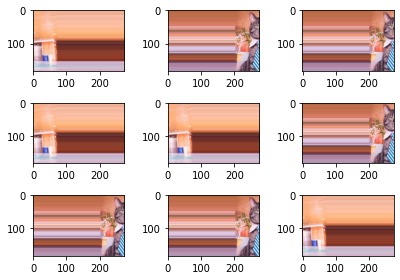

In [13]:
# Convertimos la imagen a un arreglo
data = img_to_array(img)
# realizamos una expansion a una muestra 
samples = expand_dims(data, 0)
# Creamos el aumentador de datos utilizando solo cambio de imgen 
datagen = ImageDataGenerator(width_shift_range=[-200,200])
# preparamos el iterator
it = datagen.flow(samples, batch_size=1)
# generamos muestras y mostramos los resultados
for i in range(9):
	plt.subplot(330 + 1 + i)
	# se generan lotes de imagenes
	batch = it.next()
	image = batch[0].astype('uint8') #se convierte a un valor valido para poder mostrarlo como imagen 
	plt.imshow(image)
	plt.tight_layout()
plt.show()

An image rotation means reversing the rows or columns of pixels in the case of a vertical or horizontal rotation, respectively.
The magnification is specified by a boolean argument **horizontal_flip** or **vertical_flip** for the class **ImageDataGenerator**.

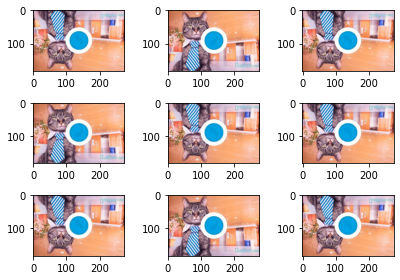

In [14]:
datagen = ImageDataGenerator(vertical_flip=True)
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
	plt.tight_layout()
plt.show()

The amount of zoom is uniformly sampled at random from the zoom region for each dimension (width, height) separately.

Floating or [lower limit, upper limit]. Range for random zoom. If floating, [lower limit, upper limit] = [1-zoom_range, 1 + zoom_range].

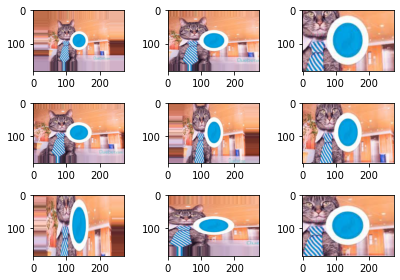

In [15]:
datagen = ImageDataGenerator(zoom_range=0.5) #float o Rango [lower,upper]
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
	plt.tight_layout()
plt.show()

The image is randomly rotated clockwise a set number of degrees from 0 to 360. This may rotate the pixels out of the image frame and leave areas of the frame without pixel data to be completed.

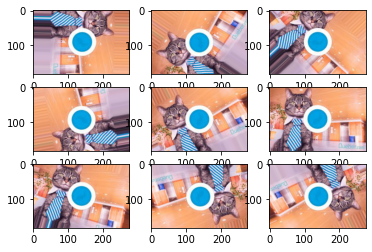

In [16]:
datagen = ImageDataGenerator(rotation_range=200)
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
plt.show()

The combination of these techniques allows us to increase the amount of data from the dataset to be used, in many jobs an increase of data is used to increase the amount of training images and improve the accuracy of the work.


              featurewise_center: Boleano, poner la media de cada elemento en cero de todos los datos.
              samplewise_center**: Boleano, poener la media del cada muestra a cero
              featurewise_std_normalization: Boleano, Divida las entradas por la desviación estándar (std.) del conjunto de datos, según las características.
              samplewise_std_normalization: Boleano, divide cada dato por su std.
              zca_epsilon: El valor predeterminado es 1e-6.
              zca_whitening: Boleano, indica si se aplica el blanqueo ZCA.      

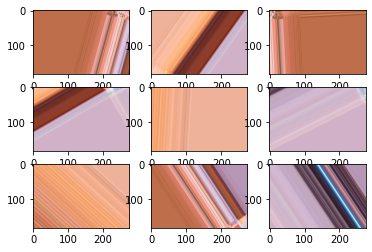

In [17]:
datagen = ImageDataGenerator(
            rotation_range               = 180,
            width_shift_range            = [150,150],   
            height_shift_range           = [200,200],   
            horizontal_flip              = True,   
            vertical_flip                = True)  
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
plt.show()

Now that we consider words, the work required is not so simple given the inherent complexity of language (we cannot replace every word with its synonym and even if we do, we run the risk of the meaning of the sentence changing completely.
There are some libraries that can help us perform this task, we will start by analyzing the following ones:


1. Text Attack
2. Google Trans

# TextAttack
It is a Python framework for opponent attacks, opponent training and NLP data augmentation. We will focus only on data augmentation.

In [18]:
!pip install textattack

     |████████████████████████████████| 327kB 2.7MB/s 
     |████████████████████████████████| 686kB 11.2MB/s 
     |████████████████████████████████| 102kB 8.1MB/s 
     |████████████████████████████████| 153kB 14.8MB/s 
     |████████████████████████████████| 235kB 13.9MB/s 
     |████████████████████████████████| 61kB 6.8MB/s 
     |████████████████████████████████| 3.0MB 17.0MB/s 
     |████████████████████████████████| 245kB 30.0MB/s 
     |████████████████████████████████| 1.7MB 31.4MB/s 
     |████████████████████████████████| 317kB 50.1MB/s 
     |████████████████████████████████| 1.1MB 47.2MB/s 
     |████████████████████████████████| 778kB 38.0MB/s 
     |████████████████████████████████| 61kB 7.6MB/s 
     |████████████████████████████████| 204kB 44.9MB/s 
     |████████████████████████████████| 245kB 42.9MB/s 
     |████████████████████████████████| 17.3MB 233kB/s 
     |████████████████████████████████| 276kB 44.8MB/s 
     |████████████████████████████████| 798kB 29.9MB/s

In [19]:
from textattack.augmentation import WordNetAugmenter, EmbeddingAugmenter, EasyDataAugmenter, CharSwapAugmenter

textattack: Updating TextAttack package dependencies.
textattack: Downloading NLTK required packages.


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw.zip.
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


2020-10-16 16:14:01 INFO: Downloading default packages for language: en (English)...
2020-10-16 16:16:35 INFO: Finished downloading models and saved to /root/stanza_resources.
wandb: WARNING W&B installed but not logged in.  Run `wandb login` or set the WANDB_API_KEY env variable.


In [21]:
text = "Will you look back on life and say, I wish I had, or I’m glad I did?"

TextAttack provides four methods of data enhancement.


## WordNetAugmenter
Increases the text by replacing it with synonyms from the WordNet thesaurus (thesaurus).

WordNet is an English lexical database. Nouns, verbs, adjectives and adverbs are grouped into sets of cognitive synonyms (synsets), each of which expresses a different concept.
WordNet superficially resembles a thesaurus, since it groups words according to their meaning.



In [22]:
aug = WordNetAugmenter();
aug.augment(text)

['Will you look back on aliveness and say, I wish I had, or I’m glad I did?']


## EmbeddingAugmenter
 Increases text by transforming words with their inlays, with a restriction to ensure that their cosine similarity is at least 0.8.


In [23]:
aug = EmbeddingAugmenter();
aug.augment(text)

textattack: Downloading https://textattack.s3.amazonaws.com/word_embeddings/paragramcf.
100%|██████████| 481M/481M [00:08<00:00, 55.4MB/s]
textattack: Unzipping file /root/.cache/textattack/tmpb01u7ulm.zip to /root/.cache/textattack/word_embeddings/paragramcf.
textattack: Successfully saved word_embeddings/paragramcf to cache.


['Willingness you look back on life and say, I wish I had, or I’m glad I did?']

## CharSwapAugmenter
Increase text by substituting, deleting, inserting and exchanging adjacent characters.

In [24]:
aug = CharSwapAugmenter()
aug.augment(text)

['Will you look back on life and say, I wih I had, or I’m glad I did?']


## EasyDataAugmenter
This augments the text with a combination of Wordnet synonym replacement, word deletion, word order changes, and synonym insertions. All 4 of these features occur randomly. So we will get different results every time we run the code. This returns 4 augmented results, unlike the other methods.


In [25]:
aug = EasyDataAugmenter()
aug.augment(text)

['Will you aspect back on life and say, I wish I had, or I’m glad I did?',
 'Will you look back on life and say, I wish I had, or I’m glad did I?',
 'Will you look back on life and say, I wish I had, or I’m I did?',
 'Will you look back on life and say, I wish I had, or I happy’m glad I did?']

Googletrans uses Google Translate's Ajax API for language detection and translation.

The key parameters for the **translate ()** method are:



1.   **src**: source language. This parameter is optional as **googletrans** will detect it.
2.   **dest**: target language. Obligatory parameter.

1.   **text**: the text to be translated from the source language to the target language. Obligatory parameter.





 



When using this method what happens is a retranslation, we go from the original language to a target language and then back to the original. During this retranslation, there is a slight change in the sentence between the original text and the retranslated text, but the general meaning of the sentence is still preserved.

Translated with www.DeepL.com/Translator (free version)

Supported languages are available at https://cloud.google.com/translate/docs/languages?hl=es

To get the best results it is recommended to make some tests with the languages, if the target language is very similar the translation does not lose information, however you can have the problem that the translation is too literal, this becomes a bit of a trial and error problem.


Some examples of languages:


* Afrikaans 'af

* Chinese (simplified) 'zh-CN or zh

* Esperanto 'eo

* Japanese 'ja
* Latin 'la


* English 'en'.


* Turkmen 'tk


* Yiddish 'yi

* Zulu 'zu



In [26]:
!pip install googletrans

     |████████████████████████████████| 61kB 2.9MB/s 
     |████████████████████████████████| 51kB 5.0MB/s 
     |████████████████████████████████| 972kB 8.7MB/s 
     |████████████████████████████████| 71kB 7.9MB/s 
     |████████████████████████████████| 61kB 7.1MB/s 
     |████████████████████████████████| 102kB 10.9MB/s 
  Created wheel for googletrans: filename=googletrans-3.0.0-cp36-none-any.whl size=15736 sha256=481226f7eda29fe5aac29ce18f5609669024a3148445072fa0bb7285d5f6825b
  Stored in directory: /root/.cache/pip/wheels/28/1a/a7/eaf4d7a3417a0c65796c547cff4deb6d79c7d14c2abd29273e
  Created wheel for contextvars: filename=contextvars-2.4-cp36-none-any.whl size=7666 sha256=049a10e527e303a0c4201d7b2b70365860a48b40433f4e6cf1efbb0a57f031df
  Stored in directory: /root/.cache/pip/wheels/a5/7d/68/1ebae2668bda2228686e3c1cf16f2c2384cea6e9334ad5f6de
Successfully built googletrans contextvars


In [27]:
from googletrans import Translator
translator = Translator()

In [28]:
origin_text = "If at first you don’t succeed, try, try again."
text_trans = translator.translate(text=origin_text, dest='zu').text
final=translator.translate(text=text_trans, dest='en').text
print(origin_text)
print(text_trans)
print(final)

If at first you don’t succeed, try, try again.
Uma ekuqaleni ungaphumeleli, zama, uzame futhi.
If at first you fail, try again.


In [29]:
origin_text = "If at first you don’t succeed, try, try again."
text_trans = translator.translate(text=origin_text, dest='eo').text
final=translator.translate(text=text_trans, dest='en').text
print(origin_text)
print(text_trans)
print(final)

If at first you don’t succeed, try, try again.
Se unue vi ne sukcesos, provu, reprovu.
If at first you do not succeed, try, try again.


In [30]:
origin_text = "If at first you don’t succeed, try, try again."
text_trans = translator.translate(text=origin_text, dest='la').text
final=translator.translate(text=text_trans, dest='en').text
print(origin_text)
print(text_trans)
print(final)

If at first you don’t succeed, try, try again.
Si non prius succederent quaerite convertimini.
If you do not succeed, seek: return first.


In [31]:
origin_text = "If at first you don’t succeed, try, try again."
text_trans = translator.translate(text=origin_text, dest='ja').text
final=translator.translate(text=text_trans, dest='en').text
print(origin_text)
print(text_trans)
print(final)

If at first you don’t succeed, try, try again.
最初はうまくいかない場合は、もう一度やり直してください。
If it doesn't work at first, try again.


In [32]:
origin_text = "If at first you don’t succeed, try, try again."
text_trans = translator.translate(text=origin_text, dest='yi').text
final=translator.translate(text=text_trans, dest='en').text
print(origin_text)
print(text_trans)
print(final)

If at first you don’t succeed, try, try again.
אויב אין ערשטער איר טאָן ניט מצליח, פּרובירן, פּרובירן ווידער.
If at first you do not succeed, try, try again.


In [33]:
origin_text = "If at first you don’t succeed, try, try again."
text_trans = translator.translate(text=origin_text, dest='zu').text
final=translator.translate(text=text_trans, dest='en').text
print(origin_text)
print(text_trans)
print(final)

If at first you don’t succeed, try, try again.
Uma ekuqaleni ungaphumeleli, zama, uzame futhi.
If at first you fail, try again.
